In [1230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import tensorflow_docs as tfdocs
from keras.optimizers import adam
from keras.utils import plot_model
from tensorflow import keras
from keras.models import Sequential, save_model, load_model
from keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler


In [1231]:
inputs = pd.read_csv('Predictions--M2+TI.csv')
inputs.head()

,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score
0,283,283,2016-02-05,533.11273,507.525152,519.098944,536.939936,536.254726,65.805443,4900.000000,543.609544,506.468375,469.327206,588.5237,378.7857,Bullish,546.7055,-0.500000
1,284,284,2016-02-08,555.74480,508.896100,519.760506,537.195101,536.725971,69.197385,5145.238095,551.163998,508.260995,465.357992,588.5237,378.7857,Bullish,557.4506,-1.000000
2,285,285,2016-02-09,542.00714,510.268995,520.442526,537.380050,537.076076,64.682093,5709.523810,557.078174,510.413280,463.748386,588.5237,378.7857,Bullish,550.4290,-0.666667
3,286,286,2016-02-10,551.68770,511.827776,520.917994,537.314581,537.258181,58.631611,8183.333333,559.987064,511.599900,463.212736,588.5237,378.7857,Bullish,540.1177,-1.000000
4,287,287,2016-02-11,546.17530,512.352305,521.139116,537.121939,537.434014,52.152077,11309.523810,561.292362,513.435890,465.579418,588.5237,378.7857,Bullish,527.4004,0.000000


In [1232]:
inputs.describe()

,Unnamed: 0,Unnamed: 0.1,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,Close,Score
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,892.500000,892.500000,595.370481,594.335526,591.737429,589.647618,591.803424,50.641552,24757.673419,633.563616,594.443727,555.323838,751.273545,458.075973,596.435487,0.073820
std,352.327972,352.327972,146.272711,144.756724,141.553004,136.351171,124.986674,14.727982,26299.345835,148.214235,144.875690,144.442100,135.846504,109.632079,147.102959,0.505605
min,283.000000,283.000000,301.873600,314.568471,319.318274,340.871358,364.150081,17.881905,621.428571,331.253628,312.986035,255.666703,469.768400,297.952000,297.952000,-1.000000
25%,587.750000,587.750000,505.282263,510.513451,520.799127,527.581212,520.592888,40.193838,5545.238095,546.497512,511.247299,451.193318,655.928900,343.423025,506.312125,0.000000
50%,892.500000,892.500000,607.984450,605.149271,603.920737,588.254588,587.711743,50.345344,13902.380952,646.890362,604.788472,565.564949,704.574600,478.740700,608.630800,0.000000
75%,1197.250000,1197.250000,685.207925,687.348029,684.444697,665.226236,674.195879,60.751006,36071.428571,719.656685,687.292867,650.209290,873.122600,548.633900,688.026200,0.400000
max,1502.000000,1502.000000,959.511960,890.957310,859.307754,840.099523,814.862280,87.740593,132909.523810,979.188809,892.893660,835.165337,957.071100,663.024100,957.071100,1.000000


In [1233]:
inputs['Close'] = pd.to_numeric(inputs['Close'])
inputs['Score'] = pd.to_numeric(inputs['Score'])
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1220 non-null   int64  
 1   Unnamed: 0.1     1220 non-null   int64  
 2   Date             1220 non-null   object 
 3   Predicted Price  1220 non-null   float64
 4   21 SMA           1220 non-null   float64
 5   50 SMA           1220 non-null   float64
 6   100 SMA          1220 non-null   float64
 7   200 SMA          1220 non-null   float64
 8   RSI              1220 non-null   float64
 9   21-avg volume    1220 non-null   float64
 10  Upper BBand      1220 non-null   float64
 11  Middle BBand     1220 non-null   float64
 12  Lower BBand      1220 non-null   float64
 13  52-week high     1220 non-null   float64
 14  52-week low      1220 non-null   float64
 15  MACD             1220 non-null   object 
 16  Close            1220 non-null   float64
 17  Score         

In [1234]:
temp = inputs['Close'].diff()
print(temp.head())
temp = temp[1:]
print(temp.head())

inputs['Label'] = temp
inputs.tail()

0        NaN
1    10.7451
2    -7.0216
3   -10.3113
4   -12.7173
Name: Close, dtype: float64
1    10.7451
2    -7.0216
3   -10.3113
4   -12.7173
5     6.6942
Name: Close, dtype: float64


,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score,Label
1215,1498,1498,2020-10-02,769.32690,763.625714,704.062752,633.951345,510.033793,54.421634,40114.285714,785.375385,764.0730,742.770615,777.94,297.952,Bearish,756.13,0.800000,-11.20
1216,1499,1499,2020-10-05,760.92150,763.524286,707.054050,637.075427,511.625766,52.597910,37661.904762,784.911587,764.3400,743.768413,777.94,297.952,Bearish,752.55,0.000000,-3.58
1217,1500,1500,2020-10-06,752.31024,763.677619,709.937646,639.925730,513.223678,51.497360,34704.761905,784.801250,764.4000,743.998750,777.94,297.952,Bearish,750.43,0.000000,-2.12
1218,1501,1501,2020-10-07,749.86470,764.383333,713.068540,642.967828,514.874502,57.630966,34497.619048,782.682326,765.6005,748.518674,777.94,297.952,Bearish,764.05,-0.888889,13.62
1219,1502,1502,2020-10-08,758.65050,765.849524,716.152268,646.060959,516.524509,60.320947,33004.761905,782.823961,765.6695,748.515039,777.94,297.952,Bearish,770.83,0.000000,6.78


In [1235]:
temp = inputs['Predicted Price'].diff()
print(temp.head())
temp = temp[1:]
print(temp.head())

inputs['Diff'] = temp
inputs.tail()

0         NaN
1    22.63207
2   -13.73766
3     9.68056
4    -5.51240
Name: Predicted Price, dtype: float64
1    22.63207
2   -13.73766
3     9.68056
4    -5.51240
5   -10.26307
Name: Predicted Price, dtype: float64


,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score,Label,Diff
1215,1498,1498,2020-10-02,769.32690,763.625714,704.062752,633.951345,510.033793,54.421634,40114.285714,785.375385,764.0730,742.770615,777.94,297.952,Bearish,756.13,0.800000,-11.20,4.95477
1216,1499,1499,2020-10-05,760.92150,763.524286,707.054050,637.075427,511.625766,52.597910,37661.904762,784.911587,764.3400,743.768413,777.94,297.952,Bearish,752.55,0.000000,-3.58,-8.40540
1217,1500,1500,2020-10-06,752.31024,763.677619,709.937646,639.925730,513.223678,51.497360,34704.761905,784.801250,764.4000,743.998750,777.94,297.952,Bearish,750.43,0.000000,-2.12,-8.61126
1218,1501,1501,2020-10-07,749.86470,764.383333,713.068540,642.967828,514.874502,57.630966,34497.619048,782.682326,765.6005,748.518674,777.94,297.952,Bearish,764.05,-0.888889,13.62,-2.44554
1219,1502,1502,2020-10-08,758.65050,765.849524,716.152268,646.060959,516.524509,60.320947,33004.761905,782.823961,765.6695,748.515039,777.94,297.952,Bearish,770.83,0.000000,6.78,8.78580


In [1236]:
temp = inputs['RSI'].diff()
print(temp.head())
temp = temp[1:]
print(temp.head())

inputs['RSI change'] = temp
inputs.tail()

0         NaN
1    3.391942
2   -4.515292
3   -6.050482
4   -6.479533
Name: RSI, dtype: float64
1    3.391942
2   -4.515292
3   -6.050482
4   -6.479533
5    2.820814
Name: RSI, dtype: float64


,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,...,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score,Label,Diff,RSI change
1215,1498,1498,2020-10-02,769.32690,763.625714,704.062752,633.951345,510.033793,54.421634,40114.285714,...,764.0730,742.770615,777.94,297.952,Bearish,756.13,0.800000,-11.20,4.95477,-6.095653
1216,1499,1499,2020-10-05,760.92150,763.524286,707.054050,637.075427,511.625766,52.597910,37661.904762,...,764.3400,743.768413,777.94,297.952,Bearish,752.55,0.000000,-3.58,-8.40540,-1.823724
1217,1500,1500,2020-10-06,752.31024,763.677619,709.937646,639.925730,513.223678,51.497360,34704.761905,...,764.4000,743.998750,777.94,297.952,Bearish,750.43,0.000000,-2.12,-8.61126,-1.100550
1218,1501,1501,2020-10-07,749.86470,764.383333,713.068540,642.967828,514.874502,57.630966,34497.619048,...,765.6005,748.518674,777.94,297.952,Bearish,764.05,-0.888889,13.62,-2.44554,6.133606
1219,1502,1502,2020-10-08,758.65050,765.849524,716.152268,646.060959,516.524509,60.320947,33004.761905,...,765.6695,748.515039,777.94,297.952,Bearish,770.83,0.000000,6.78,8.78580,2.689980


In [1237]:
mean = inputs['Label'].mean()
std = inputs['Label'].std()

print('Mean = ', mean)
print('Std = ', std)
print('Pos Scaled = ', (mean+std)*0.3)
print('Neg Scaled = ', (mean-std)*0.3)

for i in range(len(inputs)):
    
    x = inputs['Label'][i]
    
    if x > (mean + std)*0.3:
        
        inputs['Label'][i] = 1
        
    elif x < (mean - std)*0.3:
        
        inputs['Label'][i] = -1
        
    else:
        
        inputs['Label'][i] = 0

Mean =  0.18385931091058244
Std =  10.865624566832688
Pos Scaled =  3.314845163322981
Neg Scaled =  -3.2045295767766313


C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1238]:
mean = inputs['Diff'].mean()
std = inputs['Diff'].std()

print('Mean = ', mean)
print('Std = ', std)
print('Pos Scaled = ', (mean+std)*0.3)
print('Neg Scaled = ', (mean-std)*0.3)

for i in range(len(inputs)):
    
    x = inputs['Diff'][i]
    
    if x > (mean + std)*0.3:
        
        inputs['Diff'][i] = 1
        
    elif x < (mean - std)*0.3:
        
        inputs['Diff'][i] = -1
        
    else:
        
        inputs['Diff'][i] = 0

Mean =  0.18501867924528312
Std =  10.55391947264235
Pos Scaled =  3.2216814455662903
Neg Scaled =  -3.1106702380191202


C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1239]:
mean = inputs['Score'].mean()
std = inputs['Score'].std()

print('Mean = ', mean)
print('Std = ', std)
print('Pos Scaled = ', (mean+std)*0.3)
print('Neg Scaled = ', (mean-std)*0.3)

for i in range(len(inputs)):
    
    x = inputs['Score'][i]
    
    if x > (mean + std)*0.3:
        
        inputs['Score'][i] = 1
        
    elif x < (mean - std)*0.3:
        
        inputs['Score'][i] = -1
        
    else:
        
        inputs['Score'][i] = 0

Mean =  0.07381969373739901
Std =  0.5056054060170403
Pos Scaled =  0.1738275299263318
Neg Scaled =  -0.12953571368389238


C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [1240]:
inputs.tail(25)

,Unnamed: 0,Unnamed: 0.1,Date,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,...,Middle BBand,Lower BBand,52-week high,52-week low,MACD,Close,Score,Label,Diff,RSI change
1195,1478,1478,2020-09-04,752.84560,687.700343,643.241560,567.073190,477.278625,83.101788,117204.761905,...,691.591945,599.175528,758.3863,297.952,Bullish,754.68,0.0,-1.0,1.0,-2.815448
1196,1479,1479,2020-09-07,756.36145,694.240424,645.322038,570.144430,478.813570,77.583536,120376.190476,...,698.339410,610.483475,758.3863,297.952,Bullish,747.21,0.0,-1.0,1.0,-5.518252
1197,1480,1480,2020-09-08,757.45984,700.762771,647.305056,573.474351,480.453554,78.008797,119252.380952,...,704.220110,619.320743,758.3863,297.952,Bullish,749.23,0.0,0.0,0.0,0.425261
1198,1481,1481,2020-09-09,748.66270,705.925819,649.421764,576.649690,482.033220,71.374703,120173.809524,...,709.703080,630.622053,758.3863,297.952,Bullish,740.04,0.0,-1.0,-1.0,-6.634094
1199,1482,1482,2020-09-10,740.93190,712.548171,652.306694,580.079109,483.782356,77.862888,117819.047619,...,715.793210,638.016558,758.3863,297.952,Bullish,769.45,0.0,1.0,-1.0,6.488185
1200,1483,1483,2020-09-11,758.83760,717.426390,654.784226,583.302585,485.432185,67.083717,121742.857143,...,720.915340,648.453306,769.4500,297.952,Bearish,750.09,0.0,-1.0,1.0,-10.779171
1201,1484,1484,2020-09-14,754.41170,723.255086,657.659978,586.763366,487.165710,71.469123,113685.714286,...,725.152890,651.613395,769.4500,297.952,Bearish,770.05,-1.0,1.0,-1.0,4.385406
1202,1485,1485,2020-09-15,757.15770,727.596086,660.728054,590.370698,488.828775,72.725827,110823.809524,...,730.125695,656.832033,770.0500,297.952,Bearish,776.46,1.0,1.0,0.0,1.256703
1203,1486,1486,2020-09-16,769.01950,731.924948,663.610816,593.835441,490.447355,68.398150,87971.428571,...,734.920050,664.988931,776.4600,297.952,Bearish,767.91,-1.0,-1.0,1.0,-4.327677
1204,1487,1487,2020-09-17,768.45640,736.246238,666.479024,597.068646,492.067332,65.860831,86659.523810,...,739.229435,673.727194,776.4600,297.952,Bearish,762.77,-1.0,-1.0,0.0,-2.537319


In [1241]:
inputs.describe()

,Unnamed: 0,Unnamed: 0.1,Predicted Price,21 SMA,50 SMA,100 SMA,200 SMA,RSI,21-avg volume,Upper BBand,Middle BBand,Lower BBand,52-week high,52-week low,Close,Score,Label,Diff,RSI change
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1219.000000
mean,892.500000,892.500000,595.370481,594.335526,591.737429,589.647618,591.803424,50.641552,24757.673419,633.563616,594.443727,555.323838,751.273545,458.075973,596.435487,0.095082,-0.022951,-0.004098,-0.004499
std,352.327972,352.327972,146.272711,144.756724,141.553004,136.351171,124.986674,14.727982,26299.345835,148.214235,144.875690,144.442100,135.846504,109.632079,147.102959,0.692732,0.802660,0.775433,4.632256
min,283.000000,283.000000,301.873600,314.568471,319.318274,340.871358,364.150081,17.881905,621.428571,331.253628,312.986035,255.666703,469.768400,297.952000,297.952000,-1.000000,-1.000000,-1.000000,-15.461162
25%,587.750000,587.750000,505.282263,510.513451,520.799127,527.581212,520.592888,40.193838,5545.238095,546.497512,511.247299,451.193318,655.928900,343.423025,506.312125,0.000000,-1.000000,-1.000000,-2.580527
50%,892.500000,892.500000,607.984450,605.149271,603.920737,588.254588,587.711743,50.345344,13902.380952,646.890362,604.788472,565.564949,704.574600,478.740700,608.630800,0.000000,0.000000,0.000000,0.000000
75%,1197.250000,1197.250000,685.207925,687.348029,684.444697,665.226236,674.195879,60.751006,36071.428571,719.656685,687.292867,650.209290,873.122600,548.633900,688.026200,1.000000,1.000000,1.000000,2.574206
max,1502.000000,1502.000000,959.511960,890.957310,859.307754,840.099523,814.862280,87.740593,132909.523810,979.188809,892.893660,835.165337,957.071100,663.024100,957.071100,1.000000,1.000000,1.000000,21.777233


In [1242]:
new_inputs = pd.DataFrame(columns = [ 'Price', 'Score','RSI', 'Label'])
new_inputs['Price'] = inputs['Diff']
new_inputs['Score'] = inputs['Score']
new_inputs['RSI'] = inputs['RSI change']
new_inputs['Label'] = inputs['Label']
new_inputs = new_inputs.iloc[1:]
new_inputs.head()


,Price,Score,RSI,Label
1,1.0,-1.0,3.391942,1.0
2,-1.0,-1.0,-4.515292,-1.0
3,1.0,-1.0,-6.050482,-1.0
4,-1.0,0.0,-6.479533,-1.0
5,-1.0,0.0,2.820814,1.0


Positive: 379 , Negative: 407 , Neutral: 433


Text(0.5, 1.0, 'Sentiment Data Distribution')

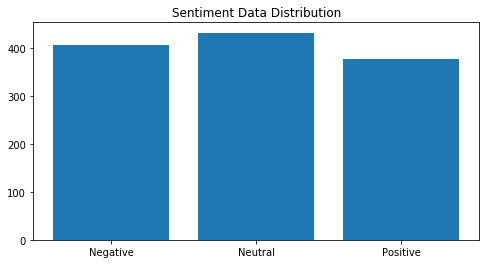

In [1243]:

plt.figure(figsize=(8,4))
count_pos = new_inputs['Label'].value_counts()[1]
count_ntl = new_inputs['Label'].value_counts()[0]
count_neg = new_inputs['Label'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

In [1244]:
new_inputs.head()


,Price,Score,RSI,Label
1,1.0,-1.0,3.391942,1.0
2,-1.0,-1.0,-4.515292,-1.0
3,1.0,-1.0,-6.050482,-1.0
4,-1.0,0.0,-6.479533,-1.0
5,-1.0,0.0,2.820814,1.0


In [1245]:
#new_inputs = new_inputs.sample(frac=1).reset_index(drop=True)
new_inputs.head(25)

,Price,Score,RSI,Label
1,1.0,-1.0,3.391942,1.0
2,-1.0,-1.0,-4.515292,-1.0
3,1.0,-1.0,-6.050482,-1.0
4,-1.0,0.0,-6.479533,-1.0
5,-1.0,0.0,2.820814,1.0
6,0.0,0.0,0.809913,0.0
7,0.0,0.0,1.909954,1.0
8,0.0,0.0,1.547825,1.0
9,1.0,1.0,-2.580452,-1.0
10,0.0,1.0,1.625057,1.0


Positive: 274 , Negative: 301 , Neutral: 278
[ 1.         -1.          3.39194223  1.        ]
122
244


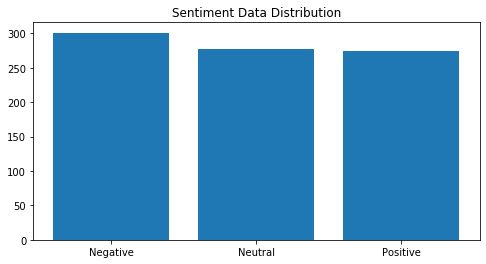

In [1246]:
train_data = new_inputs[:int(len(new_inputs)*0.7)]
test_data = new_inputs[int(len(new_inputs)*0.7):int(len(new_inputs)*0.8)]
val_data = new_inputs[int(len(new_inputs)*0.8):]

#Convert to ndarray


plt.figure(figsize=(8,4))
count_pos = train_data['Label'].value_counts()[1]
count_ntl = train_data['Label'].value_counts()[0]
count_neg = train_data['Label'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
val_data = np.asarray(val_data)
    
#Transform data

    

print(train_data[0])
print(test_data.shape[0])
print(val_data.shape[0])

In [1247]:
def data_prep(train_data):
    x_train = []
    y_train = []

    for i in range(train_data.shape[0]):

        x_train.append(train_data[i][:3])
        y_train.append(train_data[i][3:])

    x_train = np.array(x_train) 
    y_train = np.array(y_train)

    return x_train, y_train

x_train, y_train = data_prep(train_data)
x_test, y_test = data_prep(test_data)
x_val, y_val = data_prep(val_data)

x_val

array([[-1.00000000e+00, -1.00000000e+00,  9.81953729e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.67659516e-01],
       [ 0.00000000e+00,  0.00000000e+00,  6.63520450e+00],
       [ 1.00000000e+00, -1.00000000e+00,  9.17282909e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.54114632e+00],
       [ 1.00000000e+00,  1.00000000e+00,  8.32050809e+00],
       [ 1.00000000e+00,  1.00000000e+00,  7.57750470e+00],
       [ 1.00000000e+00,  1.00000000e+00,  6.37924889e+00],
       [ 1.00000000e+00,  1.00000000e+00,  4.68962781e+00],
       [ 1.00000000e+00,  1.00000000e+00,  2.65459722e+00],
       [-1.00000000e+00,  1.00000000e+00,  8.49316891e-01],
       [ 1.00000000e+00,  1.00000000e+00,  9.53387725e-01],
       [ 1.00000000e+00, -1.00000000e+00, -4.59523982e+00],
       [ 0.00000000e+00,  1.00000000e+00, -1.24478593e+01],
       [-1.00000000e+00, -1.00000000e+00,  3.33306411e+00],
       [ 1.00000000e+00,  1.00000000e+00,  4.43601262e+00],
       [ 1.00000000e+00,  1.00000000e+00

In [1248]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
#labels = np.argmax(labels, axis=1)
print(y_train[:10])
print(y_test[:10])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [1249]:
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

print("x_train shape:", x_train.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_test)

x_train shape: (853, 3)
y_train shape: (853, 3)
y_test shape: (122, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 16)                64        
_________________________________________________________________
dropout_73 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_292 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_74 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_293 (Dense)            (None, 3)                 99        
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


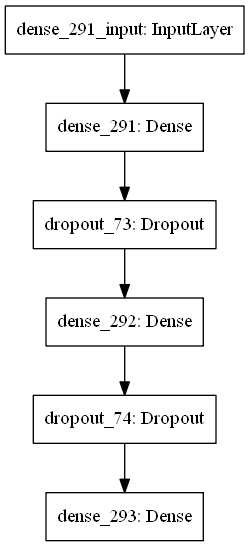

In [1250]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def create_model(x_train, units_1, units_2):
    
    # Neural network
    model = Sequential()
    model.add(Dense(16, input_dim=3, activation= 'relu', kernel_initializer='glorot_uniform',))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation= 'relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(16, activation= 'relu'))
    model.add(Dense(3, activation= 'softmax'))

    return model
    
    
model = create_model(x_train, 16, 32)

model.summary()

plot_model(model, to_file='model.png')

In [1251]:
def compile_model(model, x_train, y_train, x_test, y_test):
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_test, y_test), verbose = 1, )
    return history

history = compile_model(model, x_train, y_train, x_test, y_test)

Train on 853 samples, validate on 122 samples
Epoch 1/10
853/853 [==============================] - 2s 2ms/step - loss: 1.1073 - acc: 0.3822 - val_loss: 0.8863 - val_acc: 0.4754
Epoch 2/10
853/853 [==============================] - 0s 170us/step - loss: 0.7503 - acc: 0.6366 - val_loss: 0.7747 - val_acc: 0.5656
Epoch 3/10
853/853 [==============================] - 0s 164us/step - loss: 0.6199 - acc: 0.7515 - val_loss: 0.6950 - val_acc: 0.7787
Epoch 4/10
853/853 [==============================] - 0s 171us/step - loss: 0.5406 - acc: 0.8242 - val_loss: 0.6305 - val_acc: 0.8443
Epoch 5/10
853/853 [==============================] - 0s 172us/step - loss: 0.4784 - acc: 0.8605 - val_loss: 0.5676 - val_acc: 0.8525
Epoch 6/10
853/853 [==============================] - 0s 175us/step - loss: 0.4235 - acc: 0.8839 - val_loss: 0.5109 - val_acc: 0.8689
Epoch 7/10
853/853 [==============================] - 0s 168us/step - loss: 0.3746 - acc: 0.9039 - val_loss: 0.4670 - val_acc: 0.8689
Epoch 8/10
853/853

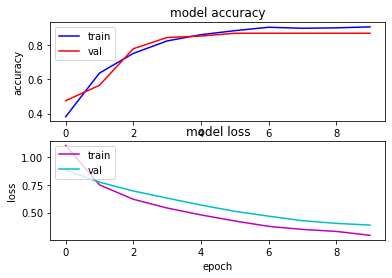

In [1252]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['train', 'val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [1253]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        #print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        #print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        #print(score[2], '-1\n---')
        return -1

scores = model.predict(x_test, verbose=1, batch_size=10)
y_pred_1d = [decode_sentiment(score) for score in scores]
temp = [decode_sentiment(score) for score in y_test]

122/122 [==============================] - 2s 16ms/step


In [1254]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [1255]:
#print(test_data)
print(y_pred_1d)
#cnf_matrix = confusion_matrix(test_data['Label'].to_list(), y_pred_1d)


[1, -1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, -1, 1, 0, -1, 0, 1, 0, 0, -1, 0, 0, 1, 1, -1, 1, 1, -1, 0, -1, 1, 0, -1, 0, -1, -1, 0, -1, -1, 1, 1, 1, 0, -1, -1, 1, 0, -1, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 1, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, -1, 1, -1, 1, -1, 0, 1, -1, 1, 1, 1, -1, 0, -1, -1, -1, -1, 0, -1, 1, 0, 0, 1, 0, -1, -1]


In [1256]:
print(temp)

[1, -1, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, -1, 0, 1, 1, -1, 0, 1, -1, 0, -1, 1, 0, -1, 0, -1, -1, 0, -1, -1, 1, 0, 1, 0, -1, -1, 1, 0, -1, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, -1, 0, -1, 0, 1, -1, 1, 1, 1, -1, 0, 0, -1, -1, -1, 0, -1, 1, 0, 0, 0, 0, 0, -1]


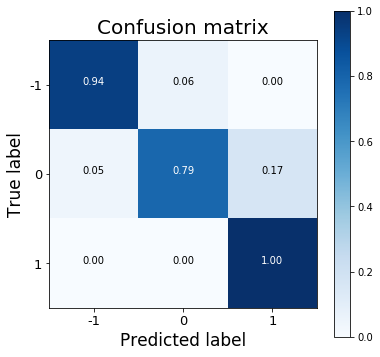

In [1257]:
cnf_matrix = confusion_matrix(temp, y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=[-1, 0, 1], title="Confusion matrix")
plt.show()

In [1258]:
print(classification_report(list(temp), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.91      0.94      0.93        33
           0       0.96      0.79      0.87        66
           1       0.68      1.00      0.81        23

    accuracy                           0.87       122
   macro avg       0.85      0.91      0.87       122
weighted avg       0.90      0.87      0.87       122



In [1259]:
scores = model.predict(x_val, verbose=1, batch_size=10)
y_pred_1d = [decode_sentiment(score) for score in scores]
temp = [decode_sentiment(score) for score in y_val]

244/244 [==============================] - 0s 425us/step


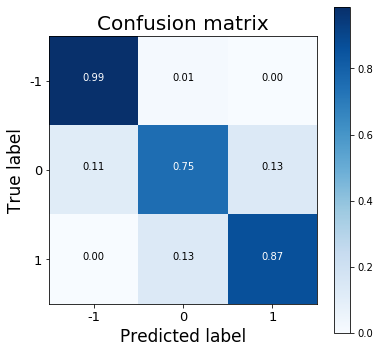

In [1261]:
cnf_matrix = confusion_matrix(temp, y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=[-1, 0, 1], title="Confusion matrix")
plt.show()

In [1262]:
print(classification_report(list(temp), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.88      0.99      0.93        73
           0       0.85      0.75      0.80        89
           1       0.86      0.87      0.86        82

    accuracy                           0.86       244
   macro avg       0.86      0.87      0.86       244
weighted avg       0.86      0.86      0.86       244

